In [ ]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
username = "neo4j"
password = "password"
driver = GraphDatabase.driver(uri, auth=(username, password))

In [3]:
try:
    with driver.session() as session:
        result = session.run("RETURN 1 AS test")
    print("Connection successful")
except Exception as e:
    print(f"Connection failed: {e}")

Connection failed: Couldn't connect to localhost:7687 (resolved to ('[::1]:7687', '127.0.0.1:7687')):
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)


In [7]:
import os
with open('./path.txt','r') as f:
    path = f.read()
os.path.exists(path)

True

In [8]:
business_path = "yelp_academic_dataset_business.json"
checkin_path = "yelp_academic_dataset_checkin.json"
review_path = "yelp_academic_dataset_review.json"
tip_path = "yelp_academic_dataset_tip.json"
user_path = "yelp_academic_dataset_user.json"

business_path, checkin_path, review_path, tip_path, user_path = list(map(lambda y: path + '/' + y,[business_path, checkin_path, review_path, tip_path, user_path]))

In [14]:
import pandas as pd
import json

df_user = pd.concat(pd.read_json(user_path, lines=True, chunksize=1000), ignore_index=True)

df_user.describe()

# df_business = pd.concat(pd.read_json(business_path, lines=True, chunksize=1000), ignore_index=True)
# df_checkin = pd.concat(pd.read_json(checkin_path, lines=True, chunksize=1000), ignore_index=True)
# df_review = pd.concat(pd.read_json(review_path, lines=True, chunksize=1000), ignore_index=True)
# df_tip = pd.concat(pd.read_json(tip_path, lines=True, chunksize=1000), ignore_index=True)

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


In [15]:
df_user = df_user[df_user['useful'] > 40]

df1 = df_user[df_user['fans'] > 10]
print(df1.shape[0])
df2 = df1[df1['review_count'] > 100]
print(df2.shape[0])
df3 = df2[df2['friends'].str.split(',').map(len) > 1]
print(df3.shape[0])

46770
41443
41371


In [11]:
df2.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000
mean,378.513253,1320.421692,630.448969,922.086540,47.153165,3.903824,78.821730,9.829914,7.490272,5.687756,2.874668,53.364216,124.968015,119.831507,119.831507,42.029378,54.300029
std,389.049213,4242.469479,2751.209396,3807.413441,115.625017,0.345668,503.311077,88.229138,104.696042,78.430178,69.509320,412.941306,817.416210,658.255815,658.255815,218.869759,656.758213
min,101.000000,61.000000,0.000000,11.000000,11.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,181.000000,310.000000,82.000000,136.000000,15.000000,3.690000,4.000000,1.000000,0.000000,0.000000,0.000000,6.000000,9.000000,9.000000,9.000000,5.000000,2.000000
50%,274.000000,529.000000,171.000000,256.000000,24.000000,3.910000,10.000000,3.000000,1.000000,0.000000,0.000000,13.000000,19.000000,21.000000,21.000000,12.000000,5.000000
75%,440.000000,1035.000000,410.000000,587.750000,43.000000,4.130000,31.000000,7.000000,3.000000,2.000000,1.000000,31.000000,49.000000,57.000000,57.000000,28.000000,14.000000
max,17473.000000,206296.000000,185823.000000,199878.000000,12497.000000,5.000000,25784.000000,13501.000000,14180.000000,13654.000000,12669.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,82630.000000


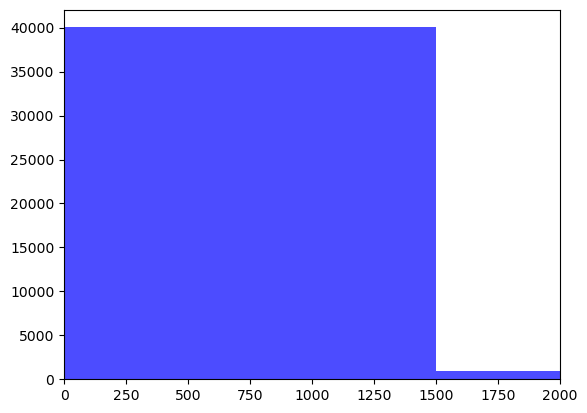

In [12]:
import matplotlib.pyplot as plt

plt.hist(df2['friends'].str.split(',').map(len), color='blue', alpha=0.7)
plt.xlim(0,2000)
plt.show()


In [16]:
df_review = pd.concat(pd.read_json(review_path, lines=True, chunksize=1000), ignore_index=True)

In [ ]:
list = df3['user_id'].values

def relavent_review(review_userID):
    return (review_userID in list)

mask = df_review['user_id'].apply(relavent_review)
# filtered_review=pd.DataFrame(df_review[df_review['user_id'].apply(relavent_review)])

# print(filtered_review)

df_reviewFilt = df_review[mask]
df_reviewFilt.describe()

In [13]:
import json

def add_node_user(tx, data):
    tx.run("MERGE (n:User {user_id: $user_id}) SET n.name = $name, n.review_count = $review_count, n.friends = $friends, n.average_stars = $average_stars, n.elite = $elite, n.funny = $funny",name=data.get('name'),friends=data.get('friends').split(','),user_id=data.get('user_id'),review_count=data.get('review_count'),average_stars=data.get('average_stars'),elite=data.get('elite').split(','),funny=data.get('funny'))
    print("user_id: " + data.get('user_id'))

def add_node_business(tx, data):
    try:
        tx.run("MERGE (n:Business {business_id: $business_id}) SET n.name = $name, n.city = $city, n.state = $state, n.stars = $stars, n.latitude = $latitude, n.longitude = $longitude, n.review_count = $review_count, n.is_open = $is_open, n.attributes = $attributes, n.categories = $categories, n.hours = $hours",name=data.get('name'),attributes=[value for value in data.get('attributes').values()] if data.get('attributes') else [],business_id=data.get('business_id'),city=data.get('city'),state=data.get('state'),stars=data.get('stars'),latitude=data.get('latitude'),longitude=data.get('longitude'),review_count=data.get('review_count'),is_open=data.get('is_open'),categories=data.get('categories').split(','),hours=[value for value in data.get('hours').values()] if data.get('hours') else [])
    except Exception as e:
        print(f"Error: {e}")
        print(f"Error in line: {data.get('name')}")
    print("business_id: " + data.get('business_id'))

def add_node_review(tx, data):
    tx.run("MERGE (n:Review {review_id: $review_id}) SET n.user_id = $user_id, n.business_id = $business_id, n.stars = $stars, n.date = $date, n.text = $text, n.useful = $useful, n.funny = $funny",review_id=data.get('review_id'),user_id=data.get('user_id'),business_id=data.get('business_id'),stars=data.get('stars'),date=data.get('date'),text=data.get('text'),useful=data.get('useful'),funny=data.get('funny'))
    print("review_id: " + data.get('review_id'))

def add_node_tip(tx, data):
    tx.run("MERGE (n:Tip {business_id: $business_id, user_id: $user_id, text: $text}) SET n.compliment_count = $compliment_count, n.date = $date",business_id=data.get('business_id'),user_id=data.get('user_id'),text=data.get('text'),compliment_count=data.get('compliment_count'),date=data.get('date'))
    print("business_id: " + data.get('business_id') + ", user_id: " + data.get('user_id'))

for file_path in [business_path, checkin_path, review_path, tip_path, user_path]:
# for file_path in [user_path]:
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist.")
        continue
    print(f"Processing {file_path}...")
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            if file_path == business_path:
                with driver.session() as session:
                    session.execute_write(add_node_business, data)
            elif file_path == review_path:
                with driver.session() as session:
                    session.execute_write(add_node_review, data)
            elif file_path == tip_path:
                with driver.session() as session:
                    session.execute_write(add_node_tip, data)
            elif file_path == user_path:
                with driver.session() as session:
                    session.execute_write(add_node_user, data)

Processing C:/Users/susha/.Neo4jDesktop/relate-data/dbmss/dbms-7e38cc21-430f-4d20-84d1-d870dda6290e/import/yelp_academic_dataset_business.json...


Transaction failed and will be retried in 0.9885949768213488s (Couldn't connect to localhost:7687 (resolved to ('[::1]:7687', '127.0.0.1:7687')):
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [WinError 10061] No connection could be made because the target machine actively refused it))
Transaction failed and will be retried in 1.8352569430454535s (Couldn't connect to localhost:7687 (resolved to ('[::1]:7687', '127.0.0.1:7687')):
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [WinError 10061] No connection could be made because the target machine actively refused it))
Tr

ServiceUnavailable: Couldn't connect to localhost:7687 (resolved to ('[::1]:7687', '127.0.0.1:7687')):
Failed to establish connection to ResolvedIPv6Address(('::1', 7687, 0, 0)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)
Failed to establish connection to ResolvedIPv4Address(('127.0.0.1', 7687)) (reason [WinError 10061] No connection could be made because the target machine actively refused it)